<a href="https://colab.research.google.com/github/subhashpolisetti/timegpt-tabula-rdl-forecasting/blob/main/Synthetic_Data_Generation_and_Analysis_Insurance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabula: Synthetic Data Generation with Pretrained Model

## Overview
This notebook demonstrates the use of **Tabula**, a generative model using transformers, to generate synthetic data based on a real-world dataset (insurance data). The process involves training a machine learning model on the dataset, performing gradient descent optimization, and generating synthetic data that mimics the original data’s statistical properties. The notebook also demonstrates how to save, load, and evaluate the pretrained model.

## Key Steps:

### 1. **Library Imports**
The following libraries are imported to handle model training, data manipulation, and synthetic data generation:
- **torch**: For deep learning and model training.
- **tabula**: A library for generating synthetic data using transformer models (e.g., GPT-based models).
- **pandas**: Used for loading and manipulating datasets.

### 2. **Dataset Loading**
- The **Insurance_compressed.csv** dataset is loaded into a pandas DataFrame for training.

### 3. **Model Initialization and Training**
- **Tabula** is initialized with a **distilgpt2** transformer model to train on the dataset.
- **Training Process**:
  - The model is trained for **400 epochs** with a batch size of **32**.
  - The categorical columns in the dataset are specified to help the model understand which features are categorical.

### 4. **Monitoring Training Progress**
- During the training, the loss is monitored at each step, and the model’s performance improves iteratively.
- The model is trained using gradient descent, and the final model is saved.

### 5. **Synthetic Data Generation**
- After training, the model generates synthetic data with the same structure as the original dataset, while maintaining the underlying statistical properties.
- The synthetic data is saved into a **CSV file** (`insurance_400epoch.csv`).

### 6. **Model Saving**
- The trained model is saved using `torch.save()`, enabling future use without retraining the model.

### 7. **Final Output**
- **Synthetic Data**: The generated synthetic dataset is saved as a CSV file and can be used for further analysis or as a substitute for the original dataset for various use cases.


In [ ]:
pip install torch==2.0.0+cu117 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 521.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 95.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 89.2 MB/s eta 0:00:00
  Created wheel for lit: filename=lit-15.0.7-

In [ ]:
pip install torch-geometric torch-sparse torch-scatter torch-cluster torch-spline-conv pyg-lib -f https://data.pyg.org/whl/torch-2.0.0+cu117.html

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu117.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.2/887.2 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.6 MB/s eta 0:00:00


In [ ]:
pip install tabula

  Preparing metadata (setup.py) ... done
  Created wheel for tabula: filename=tabula-1.0.5-py3-none-any.whl size=10588 sha256=9ed188f8712a9b0b15a2e54ebc740042947d47332e50f6bdc9123ec1c43efe41
  Stored in directory: /root/.cache/pip/wheels/3c/5d/6a/bd13fe26e73e2170dfea1f6ccb69a69e824735e04b73192b39
Successfully built tabula


In [ ]:
!pip install tabula-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 64.6 MB/s eta 0:00:00


In [ ]:
# change tabula to tabula_middle_padding to test middle padding method
from tabula import Tabula
import pandas as pd

In [1]:
from google.colab import files
import pandas as pd

# Upload CSV file from local system
uploaded = files.upload()

Saving Insurance_compressed.csv to Insurance_compressed.csv


In [2]:
data = pd.read_csv("/content/Insurance_compressed.csv")

In [3]:
data.head()

,age,sex,bi,children,sm,region,charges
0,18,0,53.13,0,0,0,1163.4627
1,22,0,52.58,1,1,0,44501.3982
2,23,0,50.38,1,0,0,2438.0552
3,58,0,49.06,0,0,0,11381.3254
4,46,1,48.07,2,0,3,9432.9253


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bi        1338 non-null   float64
 3   children  1338 non-null   int64  
 4   sm        1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


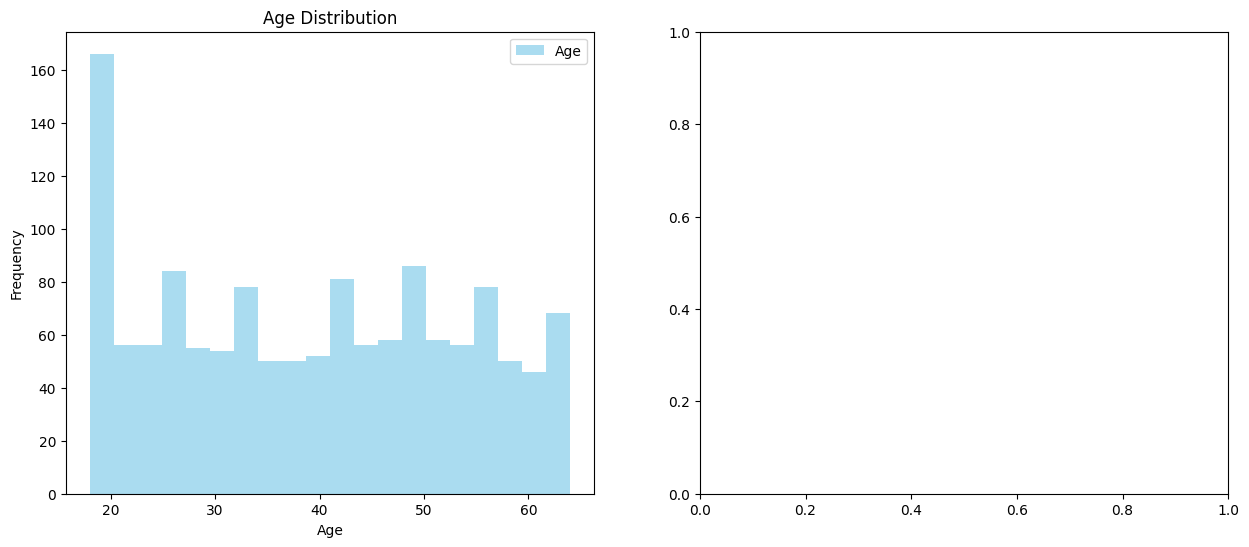

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of key features in the dataset

# Histograms of 'age' and 'charges' features
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for 'age' feature
axes[0].hist(data['age'], bins=20, alpha=0.7, color='skyblue', label='Age')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].legend()

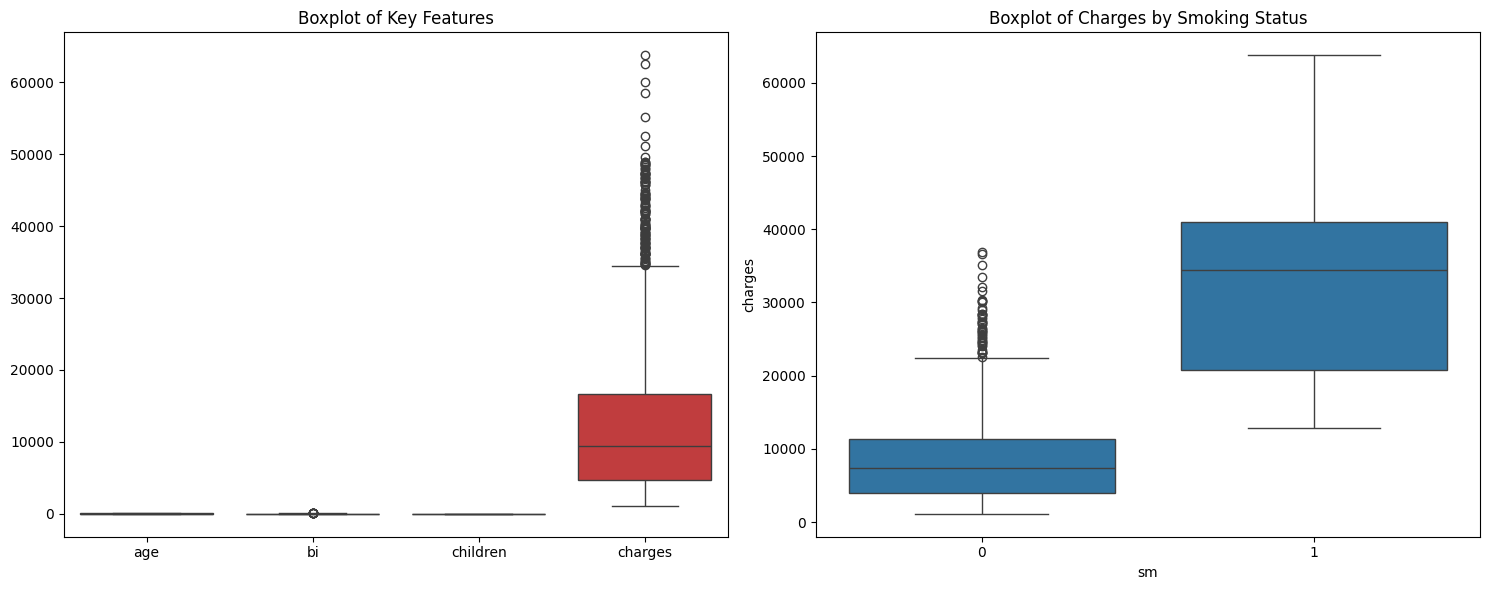

In [12]:
# Boxplots of key features to compare distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot for 'age', 'bi', 'children', and 'charges'
sns.boxplot(data=data[['age', 'bi', 'children', 'charges']], ax=axes[0])
axes[0].set_title('Boxplot of Key Features')

# Boxplot for 'charges' feature by 'sm' (smoking status)
sns.boxplot(x='sm', y='charges', data=data, ax=axes[1])
axes[1].set_title('Boxplot of Charges by Smoking Status')

plt.tight_layout()
plt.show()

In [ ]:
categorical_columns = ["sex", "children", "sm", "region"]
model = Tabula(llm='distilgpt2', experiment_dir = "insurance_training", batch_size=32, epochs=400, categorical_columns = categorical_columns)

In [ ]:
# Comment this block out to test tabula starting from randomly initialized model.
# Comment this block out when uses tabula_middle_padding
import torch
model.model.load_state_dict(torch.load("pretrained-model/model.pt"), strict=False)

_IncompatibleKeys(missing_keys=['transformer.h.0.attn.bias', 'transformer.h.0.attn.masked_bias', 'transformer.h.1.attn.bias', 'transformer.h.1.attn.masked_bias', 'transformer.h.2.attn.bias', 'transformer.h.2.attn.masked_bias', 'transformer.h.3.attn.bias', 'transformer.h.3.attn.masked_bias', 'transformer.h.4.attn.bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.5.attn.bias', 'transformer.h.5.attn.masked_bias'], unexpected_keys=[])

In [ ]:
model.fit(data)

/home/lydia/.local/lib/python3.10/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 1338
  Num Epochs = 400
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 16800
  Number of trainable parameters = 81912576
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,1.839500
1000,1.010900
1500,0.812700
2000,0.725600
2500,0.683100
3000,0.659800
3500,0.644000
4000,0.631900
4500,0.623500
5000,0.615600




Training completed. Do not forget to share your model on huggingface.co/models =)




In [ ]:
import torch
torch.save(model.model.state_dict(), "insurance_training/model_400epoch.pt")

In [ ]:
# Generate synthetic data using the trained model
# The model generates 1338 samples that resemble the original dataset's structure and statistical properties
synthetic_data = model.sample(n_samples=1338)

# Save the generated synthetic data to a CSV file
# The synthetic data is saved without the index column for easy export and future use
synthetic_data.to_csv("insurance_400epoch.csv", index=False)


  0%|                                                                                          | 0/1338 [00:00<?, ?it/s]Generate config GenerationConfig {
  "bos_token_id": 50256,
  "eos_token_id": 50256,
  "transformers_version": "4.26.0"
}

  7%|█████▉                                                                          | 99/1338 [00:00<00:05, 236.38it/s]Generate config GenerationConfig {
  "bos_token_id": 50256,
  "eos_token_id": 50256,
  "transformers_version": "4.26.0"
}

 15%|███████████▌                                                                   | 196/1338 [00:00<00:03, 341.89it/s]Generate config GenerationConfig {
  "bos_token_id": 50256,
  "eos_token_id": 50256,
  "transformers_version": "4.26.0"
}

 22%|█████████████████▏                                                             | 291/1338 [00:00<00:02, 388.87it/s]Generate config GenerationConfig {
  "bos_token_id": 50256,
  "eos_token_id": 50256,
  "transformers_version": "4.26.0"
}

 27%|█████████████████████▏ 